In [2]:
import pandas as pf 
import pickle
import matplotlib.pyplot as plt 
import numpy as np

In [3]:

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
a = unpickle('cifar-10-batches-py/data_batch_2')

In [9]:
# a[b'filenames']
# a.keys()
tmp = a[b'data'][2]

In [10]:
tmp = np.reshape(tmp,(3,32,32)).swapaxes(0,2).swapaxes(0,1)

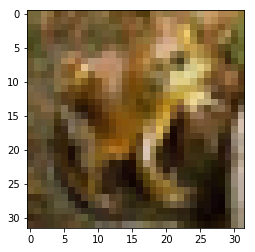

In [13]:
plt.imshow(tmp,interpolation='nearest')

In [3]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [16]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20

In [18]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [24]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))          


In [25]:
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [26]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [27]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
            metrics=['accuracy'])

In [29]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [33]:
x_train /= 255
x_test /= 255

In [34]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
            shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 5280/50000 [==>...........................] - ETA: 30:29 - loss: 2.2445 - acc: 0.1705

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\AshwinBhat\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-8fe973cfa897>", line 5, in <module>
    shuffle=True)
  File "C:\Users\AshwinBhat\Miniconda3\lib\site-packages\keras\engine\training.py", line 1039, in fit
    validation_steps=validation_steps)
  File "C:\Users\AshwinBhat\Miniconda3\lib\site-packages\keras\engine\training_arrays.py", line 199, in fit_loop
    outs = f(ins_batch)
  File "C:\Users\AshwinBhat\Miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 2715, in __call__
    return self._call(inputs)
  File "C:\Users\AshwinBhat\Miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 2675, in _call
    fetched = self._callable_fn(*array_vals)
  File "C:\Users\AshwinBhat\Miniconda3\lib\site-packages\tensorflow\python\client\session.py", line 1382, in __call__
    run_meta

KeyboardInterrupt: 